In [2]:
pip install seaborn

     |████████████████████████████████| 294 kB 6.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('/Users/roupenminassian/physionet.org/files/pulse-transit-time-ppg/1.1.0/csv/subjects_info.csv')

In [4]:
df.head()

,record,activity,gender,height,weight,age,bp_sys_start,bp_sys_end,bp_dia_start,bp_dia_end,hr_1_start,hr_1_end,hr_2_start,hr_2_end,spo2_start,spo2_end
0,s1_walk,walk,female,160,50,25,94,90,67,63,89,73,78,77,96,97
1,s1_run,run,female,160,50,25,92,94,72,76,65,78,69,71,99,98
2,s1_sit,sit,female,160,50,25,87,87,59,57,74,74,69,70,98,98
3,s2_walk,walk,male,175,70,20,125,122,84,74,112,114,107,110,96,96
4,s2_run,run,male,175,70,20,122,136,74,83,114,118,110,119,96,96


In [5]:
# Calculate the change in heart rate and SpO2 for each record
df['hr_1_change'] = df['hr_1_end'] - df['hr_1_start']
df['hr_2_change'] = df['hr_2_end'] - df['hr_2_start']
df['hr_avg_change'] = (df['hr_1_change'] + df['hr_2_change']) / 2
df['spo2_change'] = df['spo2_end'] - df['spo2_start']
df['bp_sys_change'] = df['bp_sys_end'] - df['bp_sys_start']
df['bp_dia_change'] = df['bp_dia_end'] - df['bp_dia_start']

# Categorize subjects into age groups
def categorize_age(age):
    if 18 <= age <= 30:
        return 'Young'
    elif 31 <= age <= 50:
        return 'Middle-aged'
    else:
        return 'Older'
df['age_group'] = df['age'].apply(categorize_age)

##Heart Rate

###Descriptive Statistics

In [6]:
# Descriptive Statistics for Heart Rate
age_activity_hr_stats = df.groupby(['age_group', 'activity'])['hr_avg_change'].describe()
gender_activity_hr_stats = df.groupby(['gender', 'activity'])['hr_avg_change'].describe()

In [7]:
age_activity_hr_stats

count       mean       std   min     25%    50%     75%  \
age_group   activity                                                            
Middle-aged run         4.0  -1.500000  4.082483  -7.5  -2.250   0.00   0.750   
            sit         4.0   2.375000  3.326034  -1.5   0.750   2.25   3.875   
            walk        4.0   1.875000  4.534589  -3.5  -0.125   1.75   3.750   
Older       run         1.0  10.500000       NaN  10.5  10.500  10.50  10.500   
            sit         1.0  -1.500000       NaN  -1.5  -1.500  -1.50  -1.500   
            walk        1.0  -7.000000       NaN  -7.0  -7.000  -7.00  -7.000   
Young       run        17.0   1.323529  7.430808 -10.0  -4.000   0.50   6.500   
            sit        17.0   1.117647  4.466995  -7.5  -1.500   0.00   4.500   
            walk       17.0  -2.088235  7.610099 -19.0  -8.500   2.00   3.500   

                       max  
age_group   activity        
Middle-aged run        1.5  
            sit        6.5  
            walk       7.5  
Older       run       10.5  
            sit       -1.5  
            walk      -7.0  
Young       run       17.5  
            sit        8.5  
            walk       4.0

In [8]:
gender_activity_hr_stats

count      mean       std   min    25%  50%   75%   max
gender activity                                                         
female run         7.0  0.642857  9.450372 -10.0  -6.00  0.0  4.50  17.5
       sit         7.0  3.785714  3.751190  -2.5   1.75  4.5  6.50   8.0
       walk        7.0 -5.785714  8.845230 -19.0 -10.75 -8.5  2.25   4.0
male   run        15.0  1.500000  6.035609  -7.5  -2.50  0.5  4.75  13.5
       sit        15.0  0.033333  3.907258  -7.5  -1.50 -0.5  1.75   8.5
       walk       15.0  0.366667  5.475486 -15.0  -1.00  2.5  3.00   7.5

###Distribution Plots

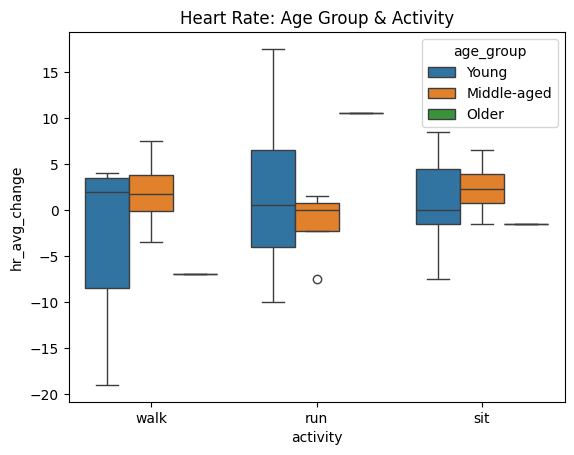

In [13]:
# Box Plots for Heart Rate by Age Group and Activity

sns.boxplot(x='activity', y='hr_avg_change', hue='age_group', data=df)
plt.title('Heart Rate: Age Group & Activity')
plt.show()

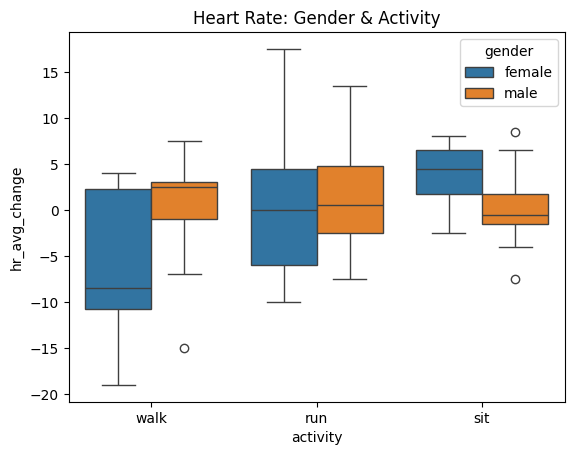

In [14]:
# Box Plots for Heart Rate by Gender and Activity
sns.boxplot(x='activity', y='hr_avg_change', hue='gender', data=df)
plt.title('Heart Rate: Gender & Activity')
plt.show()

###Hypothesis Testing

In [18]:
activities = df['activity'].unique()
anova_hr_results = pd.DataFrame(columns=['Activity', 'F-value', 'p-value', 'Significance'])
for activity in activities:
    df_filtered = df[df['activity'] == activity]
    anova = stats.f_oneway(
        df_filtered['hr_avg_change'][df_filtered['age_group'] == 'Young'],
        df_filtered['hr_avg_change'][df_filtered['age_group'] == 'Middle-aged'],
        df_filtered['hr_avg_change'][df_filtered['age_group'] == 'Older']
    )
    new_row = {
        'Activity': activity,
        'F-value': anova.statistic,
        'p-value': anova.pvalue,
        'Significance': 'Yes' if anova.pvalue < 0.05 else 'No'
    }
    anova_hr_results = pd.concat([anova_hr_results, pd.DataFrame([new_row])], ignore_index=True)

/var/folders/_5/bhrl41gd2r501h33n8qp_2xw0000gn/T/ipykernel_81746/980921559.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anova_hr_results = pd.concat([anova_hr_results, pd.DataFrame([new_row])], ignore_index=True)


In [19]:
print(anova_hr_results)

  Activity   F-value   p-value Significance
0     walk  0.783537  0.470999           No
1      run  1.179452  0.328972           No
2      sit  0.348015  0.710496           No


##Pulse Oximetry (Spo2)

###Descriptive Statistics

In [20]:
# Descriptive Statistics for SpO2
age_activity_spo2_stats = df.groupby(['age_group', 'activity'])['spo2_change'].describe()
gender_activity_spo2_stats = df.groupby(['gender', 'activity'])['spo2_change'].describe()

In [21]:
age_activity_spo2_stats

count      mean       std  min   25%  50%   75%  max
age_group   activity                                                      
Middle-aged run         4.0  0.250000  0.500000  0.0  0.00  0.0  0.25  1.0
            sit         4.0  0.250000  1.258306 -1.0 -0.25  0.0  0.50  2.0
            walk        4.0 -0.250000  0.957427 -1.0 -1.00 -0.5  0.25  1.0
Older       run         1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
            sit         1.0 -3.000000       NaN -3.0 -3.00 -3.0 -3.00 -3.0
            walk        1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
Young       run        17.0 -0.176471  0.808957 -2.0 -1.00  0.0  0.00  1.0
            sit        17.0  0.294118  1.212678 -1.0 -1.00  0.0  1.00  3.0
            walk       17.0  0.000000  0.866025 -2.0  0.00  0.0  1.00  1.0

In [22]:
gender_activity_spo2_stats

count      mean       std  min  25%  50%  75%  max
gender activity                                                    
female run         7.0  0.000000  0.577350 -1.0  0.0  0.0  0.0  1.0
       sit         7.0  0.714286  1.603567 -1.0 -0.5  0.0  2.0  3.0
       walk        7.0 -0.428571  1.133893 -2.0 -1.0 -1.0  0.5  1.0
male   run        15.0 -0.066667  0.883715 -2.0 -0.5  0.0  0.5  1.0
       sit        15.0 -0.133333  1.187234 -3.0 -1.0  0.0  0.5  2.0
       walk       15.0  0.200000  0.676123 -1.0  0.0  0.0  1.0  1.0

###Distribution Plot

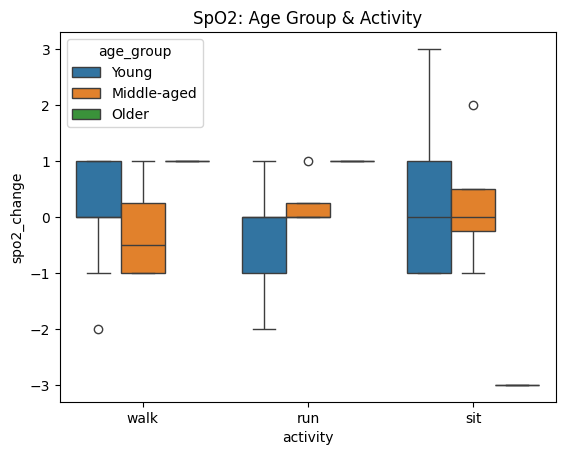

In [23]:
# Box Plots for SpO2 by Age Group and Activity
sns.boxplot(x='activity', y='spo2_change', hue='age_group', data=df)
plt.title('SpO2: Age Group & Activity')
plt.show()

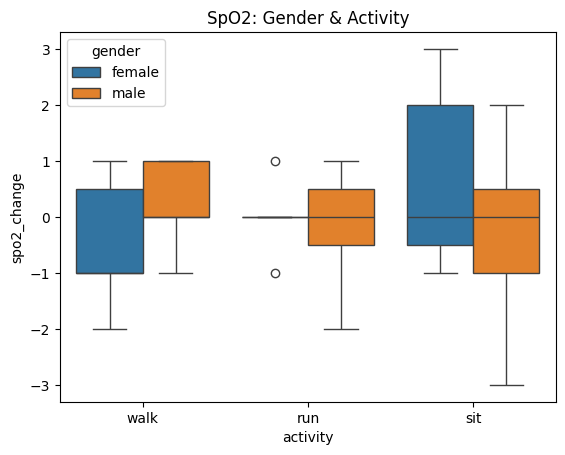

In [24]:
# Box Plots for SpO2 by Gender and Activity
sns.boxplot(x='activity', y='spo2_change', hue='gender', data=df)
plt.title('SpO2: Gender & Activity')
plt.show()

###Hypothesis Testing

In [25]:
# Hypothesis Testing for SpO2
anova_spo2_results = pd.DataFrame(columns=['Activity', 'F-value', 'p-value', 'Significance'])
for activity in activities:
    df_filtered = df[df['activity'] == activity]
    anova = stats.f_oneway(
        df_filtered['spo2_change'][df_filtered['age_group'] == 'Young'],
        df_filtered['spo2_change'][df_filtered['age_group'] == 'Middle-aged'],
        df_filtered['spo2_change'][df_filtered['age_group'] == 'Older']
    )
    new_row = {
        'Activity': activity,
        'F-value': anova.statistic,
        'p-value': anova.pvalue,
        'Significance': 'Yes' if anova.pvalue < 0.05 else 'No'
    }
    anova_spo2_results = pd.concat([anova_spo2_results, pd.DataFrame([new_row])], ignore_index=True)


/var/folders/_5/bhrl41gd2r501h33n8qp_2xw0000gn/T/ipykernel_81746/4007042618.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anova_spo2_results = pd.concat([anova_spo2_results, pd.DataFrame([new_row])], ignore_index=True)


In [26]:
print(anova_spo2_results)

  Activity   F-value   p-value Significance
0     walk  0.805085  0.461726           No
1      run  1.468069  0.255351           No
2      sit  3.463977  0.052163           No


##Systolic Blook Pressure

###Descriptive Statistics

In [27]:
# Descriptive Statistics for SpO2
age_activity_bp_sys_stats = df.groupby(['age_group', 'activity'])['bp_sys_change'].describe()
gender_activity_bp_sys_stats = df.groupby(['gender', 'activity'])['bp_sys_change'].describe()

In [28]:
age_activity_bp_sys_stats

count       mean       std   min    25%   50%    75%  \
age_group   activity                                                         
Middle-aged run         4.0  -0.750000  5.560276  -6.0  -5.25  -1.0   3.50   
            sit         4.0  -5.250000  3.201562 -10.0  -5.50  -4.0  -3.75   
            walk        4.0   4.750000  3.403430   0.0   3.75   5.5   6.50   
Older       run         1.0   4.000000       NaN   4.0   4.00   4.0   4.00   
            sit         1.0 -22.000000       NaN -22.0 -22.00 -22.0 -22.00   
            walk        1.0  -2.000000       NaN  -2.0  -2.00  -2.0  -2.00   
Young       run        17.0   6.823529  5.981589  -6.0   5.00   8.0  11.00   
            sit        17.0  -6.823529  8.232825 -23.0 -13.00  -7.0  -2.00   
            walk       17.0   0.235294  6.722438 -15.0  -3.00  -1.0   5.00   

                       max  
age_group   activity        
Middle-aged run        5.0  
            sit       -3.0  
            walk       8.0  
Older       run        4.0  
            sit      -22.0  
            walk      -2.0  
Young       run       14.0  
            sit       11.0  
            walk      16.0

In [29]:
gender_activity_bp_sys_stats

count      mean       std   min   25%  50%   75%   max
gender activity                                                        
female run         7.0  3.285714  6.725927  -6.0  -1.5  5.0   7.5  12.0
       sit         7.0 -6.571429  5.380742 -16.0  -9.0 -6.0  -3.0   0.0
       walk        7.0 -0.714286  9.928314 -15.0  -4.0 -3.0   2.5  16.0
male   run        15.0  6.266667  6.204453  -6.0   3.5  8.0  10.5  14.0
       sit        15.0 -7.533333  9.156315 -23.0 -14.0 -7.0  -3.5  11.0
       walk       15.0  1.733333  3.899939  -6.0  -1.5  2.0   5.0   6.0

###Distribution Plot

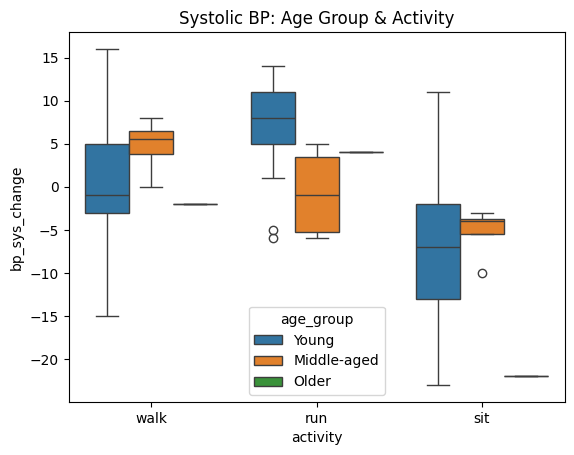

In [30]:
# Box Plots for SpO2 by Age Group and Activity
sns.boxplot(x='activity', y='bp_sys_change', hue='age_group', data=df)
plt.title('Systolic BP: Age Group & Activity')
plt.show()

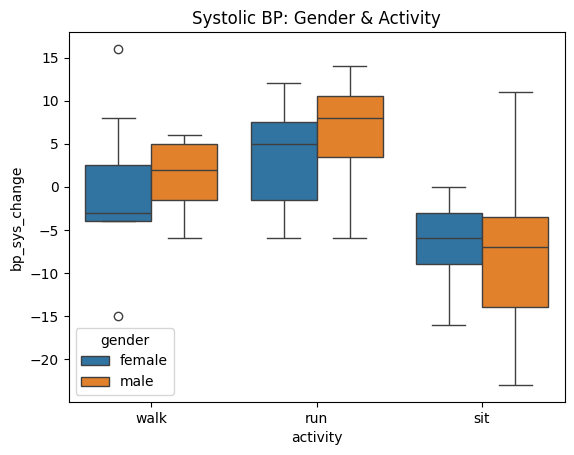

In [31]:
# Box Plots for SpO2 by Gender and Activity
sns.boxplot(x='activity', y='bp_sys_change', hue='gender', data=df)
plt.title('Systolic BP: Gender & Activity')
plt.show()

###Hypothesis Testing

In [32]:
# Hypothesis Testing for bp_sys_change
anova_bp_sys_results = pd.DataFrame(columns=['Activity', 'F-value', 'p-value', 'Significance'])
for activity in activities:
    df_filtered = df[df['activity'] == activity]
    anova = stats.f_oneway(
        df_filtered['bp_sys_change'][df_filtered['age_group'] == 'Young'],
        df_filtered['bp_sys_change'][df_filtered['age_group'] == 'Middle-aged'],
        df_filtered['bp_sys_change'][df_filtered['age_group'] == 'Older']
    )
    new_row = {
        'Activity': activity,
        'F-value': anova.statistic,
        'p-value': anova.pvalue,
        'Significance': 'Yes' if anova.pvalue < 0.05 else 'No'
    }
    anova_bp_sys_results = pd.concat([anova_bp_sys_results, pd.DataFrame([new_row])], ignore_index=True)


/var/folders/_5/bhrl41gd2r501h33n8qp_2xw0000gn/T/ipykernel_81746/1726985317.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anova_bp_sys_results = pd.concat([anova_bp_sys_results, pd.DataFrame([new_row])], ignore_index=True)


In [33]:
print(anova_bp_sys_results)

  Activity   F-value   p-value Significance
0     walk  0.942038  0.407300           No
1      run  2.678428  0.094462           No
2      sit  2.015842  0.160718           No


##Diastolic Blood Pressure

###Descriptive Statistics

In [34]:
# Descriptive Statistics for SpO2
age_activity_bp_dia_stats = df.groupby(['age_group', 'activity'])['bp_dia_change'].describe()
gender_activity_bp_dia_stats = df.groupby(['gender', 'activity'])['bp_dia_change'].describe()

In [35]:
age_activity_bp_dia_stats

count      mean       std   min   25%  50%   75%   max
age_group   activity                                                        
Middle-aged run         4.0  1.000000  2.708013  -3.0  0.75  2.0  2.25   3.0
            sit         4.0  0.250000  6.946222  -6.0 -3.75 -1.5  2.50  10.0
            walk        4.0 -1.250000  4.573474  -8.0 -2.00  0.5  1.25   2.0
Older       run         1.0 -5.000000       NaN  -5.0 -5.00 -5.0 -5.00  -5.0
            sit         1.0 -4.000000       NaN  -4.0 -4.00 -4.0 -4.00  -4.0
            walk        1.0 -2.000000       NaN  -2.0 -2.00 -2.0 -2.00  -2.0
Young       run        17.0  2.176471  3.147128  -2.0  0.00  1.0  4.00   9.0
            sit        17.0 -1.117647  3.756367  -7.0 -4.00 -1.0  2.00   5.0
            walk       17.0 -0.176471  5.015417 -10.0 -4.00  0.0  3.00   7.0

In [36]:
gender_activity_bp_dia_stats

count      mean       std   min  25%  50%  75%   max
gender activity                                                      
female run         7.0  1.714286  2.429972  -1.0 -0.5  2.0  3.5   5.0
       sit         7.0 -2.428571  4.353433  -7.0 -5.5 -4.0  0.5   4.0
       walk        7.0 -0.428571  4.540820  -5.0 -4.5  0.0  2.0   7.0
male   run        15.0  1.600000  3.737837  -5.0 -0.5  1.0  3.5   9.0
       sit        15.0 -0.333333  4.237025  -7.0 -3.0 -1.0  1.5  10.0
       walk       15.0 -0.466667  4.983783 -10.0 -2.5  0.0  2.0   7.0

###Distribution Plot

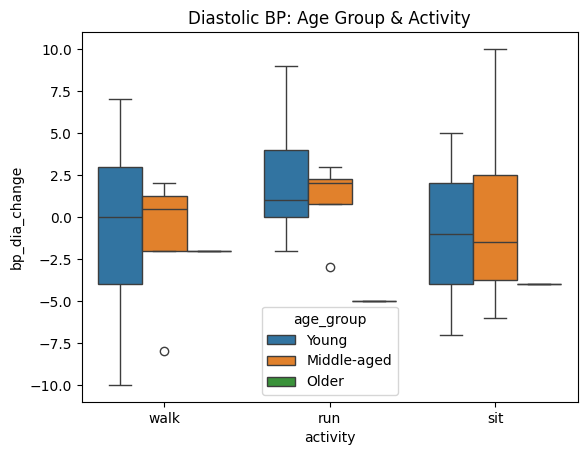

In [37]:
# Box Plots for SpO2 by Age Group and Activity
sns.boxplot(x='activity', y='bp_dia_change', hue='age_group', data=df)
plt.title('Diastolic BP: Age Group & Activity')
plt.show()

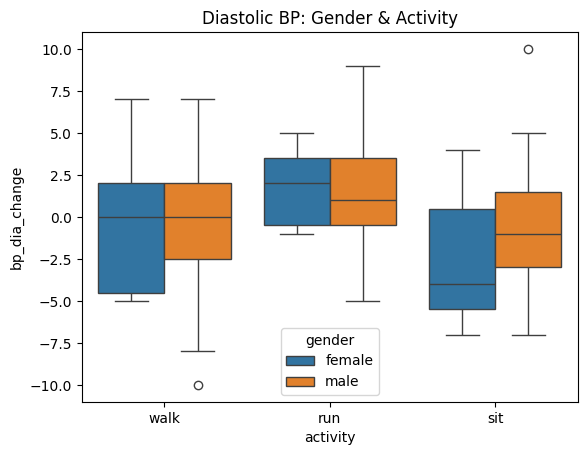

In [38]:
# Box Plots for SpO2 by Gender and Activity
sns.boxplot(x='activity', y='bp_dia_change', hue='gender', data=df)
plt.title('Diastolic BP: Gender & Activity')
plt.show()

###Hypothesis Testing

In [40]:
# Hypothesis Testing for bp_dia_change
anova_bp_dia_results = pd.DataFrame(columns=['Activity', 'F-value', 'p-value', 'Significance'])
for activity in activities:
    df_filtered = df[df['activity'] == activity]
    anova = stats.f_oneway(
        df_filtered['bp_dia_change'][df_filtered['age_group'] == 'Young'],
        df_filtered['bp_dia_change'][df_filtered['age_group'] == 'Middle-aged'],
        df_filtered['bp_dia_change'][df_filtered['age_group'] == 'Older']
    )
    new_row = {
        'Activity': activity,
        'F-value': anova.statistic,
        'p-value': anova.pvalue,
        'Significance': 'Yes' if anova.pvalue < 0.05 else 'No'
    }
    anova_bp_dia_results = pd.concat([anova_bp_dia_results, pd.DataFrame([new_row])], ignore_index=True)

/var/folders/_5/bhrl41gd2r501h33n8qp_2xw0000gn/T/ipykernel_81746/3856230026.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anova_bp_dia_results = pd.concat([anova_bp_dia_results, pd.DataFrame([new_row])], ignore_index=True)


In [41]:
print(anova_bp_dia_results)

  Activity   F-value   p-value Significance
0     walk  0.127300  0.881214           No
1      run  2.664662  0.095483           No
2      sit  0.397043  0.677754           No
